## Import Library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import math
import matplotlib.pyplot as plt

file_path = f"../Dataset/cleaned_dataset.csv"

df = pd.read_csv(file_path)
df = df.drop(columns=["dataset"])
palette = sns.color_palette("Set3", n_colors=10)
col_var = "#fb8072"

# EDA

### Dataset Structure

In [2]:
df.info(show_counts=True, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3687 non-null   int64  
 1   gender               3687 non-null   int64  
 2   race_ethnicity       3687 non-null   int64  
 3   marital_status       3687 non-null   int64  
 4   jaundice_history     3687 non-null   int64  
 5   receive_transfusion  3687 non-null   int64  
 6   liver_condition      3687 non-null   int64  
 7   injectable_drug_use  3687 non-null   int64  
 8   drug_use             3687 non-null   int64  
 9   alcohol_consumption  3687 non-null   int64  
 10  alt                  3687 non-null   float64
 11  albumin              3687 non-null   float64
 12  alp                  3687 non-null   float64
 13  ast                  3687 non-null   float64
 14  bun                  3687 non-null   float64
 15  cholesterol          3687 non-null   f

In [3]:
df.head()

,age,gender,race_ethnicity,marital_status,jaundice_history,receive_transfusion,liver_condition,injectable_drug_use,drug_use,alcohol_consumption,...,glucose,total_bilirubin,total_calcium,total_protein,triglycerides,uric_acid,ldh,globulin,osmolality,hcv_status
0,27,1,3,5,2,2,2,2,1,1,...,98.0,0.7,9.7,7.2,43.0,6.2,118.0,2.6,289.0,0
1,20,2,4,5,2,2,2,2,2,2,...,89.0,0.6,9.1,7.1,19.0,3.9,112.0,2.4,280.0,0
2,68,2,4,1,2,2,2,2,2,1,...,87.0,0.6,9.5,6.6,56.0,5.1,121.0,2.7,284.0,1
3,23,2,1,5,2,2,2,2,2,1,...,91.0,0.3,9.8,7.8,146.0,4.9,121.0,2.6,276.0,0
4,48,2,2,1,2,2,2,2,2,2,...,105.0,1.8,10.0,8.0,103.0,5.4,169.0,3.7,275.0,0


### Check Missing Value

In [4]:
df.isnull().sum()

age                    0
gender                 0
race_ethnicity         0
marital_status         0
jaundice_history       0
receive_transfusion    0
liver_condition        0
injectable_drug_use    0
drug_use               0
alcohol_consumption    0
alt                    0
albumin                0
alp                    0
ast                    0
bun                    0
cholesterol            0
cpk                    0
creatinine             0
ggt                    0
glucose                0
total_bilirubin        0
total_calcium          0
total_protein          0
triglycerides          0
uric_acid              0
ldh                    0
globulin               0
osmolality             0
hcv_status             0
dtype: int64

### Descriptive statistics

In [5]:
num_columns = ['age', 'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol', 'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium', 'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality']
df_num = df[num_columns]

cat_columns = ['gender', 'race_ethnicity',  'marital_status', 'jaundice_history',
               'receive_transfusion', 'liver_condition', 'injectable_drug_use', 'drug_use', 'alcohol_consumption', 'hcv_status']

df_cat = df[cat_columns].astype("category")

df_cat["gender"] = df_cat["gender"].replace({1: "Male", 2: "Female"})
df_cat["race_ethnicity"] = df_cat["race_ethnicity"].replace({
    1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White",
    4: "Non-Hispanic Black", 5: "Other Race"
})

df_cat["marital_status"] = df_cat["marital_status"].replace({
    1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never Married", 6: "Living with Partner"
})
df_cat["jaundice_history"] = df_cat["jaundice_history"].replace({1: "Yes", 2: "No"})
df_cat["receive_transfusion"] = df_cat["receive_transfusion"].replace({1: "Yes", 2: "No"})
df_cat["liver_condition"] = df_cat["liver_condition"].replace({1: "Yes", 2: "No"})
df_cat["injectable_drug_use"] = df_cat["injectable_drug_use"].replace({1: "Yes", 2: "No"})
df_cat["drug_use"] = df_cat["drug_use"].replace({1: "Yes", 2: "No"})
df_cat["alcohol_consumption"] = df_cat["alcohol_consumption"].replace({1: "Yes", 2: "No"})
df_cat["hcv_status"] = df_cat["hcv_status"].replace({0: "No", 1: "Yes"})


In [6]:
df_num.describe()

,age,alt,albumin,alp,ast,bun,cholesterol,cpk,creatinine,ggt,glucose,total_bilirubin,total_calcium,total_protein,triglycerides,uric_acid,ldh,globulin,osmolality
count,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000
mean,47.726336,41.063315,4.173364,72.271831,39.979452,12.844164,185.577161,155.046531,0.896770,59.273159,102.299478,0.663002,9.367297,7.280151,145.049277,5.517037,134.332973,3.106871,277.704783
std,13.096235,40.908561,0.367875,24.347244,32.827562,5.090122,39.372213,169.972968,0.461325,98.824267,37.900442,0.338720,0.347277,0.504864,119.115004,1.317653,30.952777,0.565563,4.716955
min,18.000000,6.000000,2.100000,14.000000,10.000000,2.000000,80.000000,6.000000,0.320000,5.000000,31.000000,0.020000,7.200000,5.200000,19.000000,1.800000,46.000000,1.600000,258.000000
25%,38.000000,19.000000,3.962600,57.000000,22.000000,9.627338,159.000000,88.000000,0.730000,17.000000,86.000000,0.443724,9.144435,6.958731,77.000000,4.600000,114.312750,2.700000,275.000000
50%,50.000000,29.199866,4.200000,69.000000,28.624443,12.000000,182.276450,125.000000,0.850000,27.210338,93.576048,0.600000,9.383779,7.258552,110.821179,5.497125,131.000000,3.036443,277.944858
75%,58.000000,47.000000,4.400000,83.000000,43.725941,15.000000,208.000000,157.000000,0.980000,56.000000,104.464631,0.800000,9.600000,7.600000,174.235293,6.400000,148.717833,3.400000,280.309327
max,82.000000,1363.000000,5.400000,307.000000,597.000000,95.000000,565.000000,3910.000000,17.410000,1061.000000,554.000000,4.400000,12.000000,10.300000,2986.000000,11.400000,618.000000,6.300000,323.000000


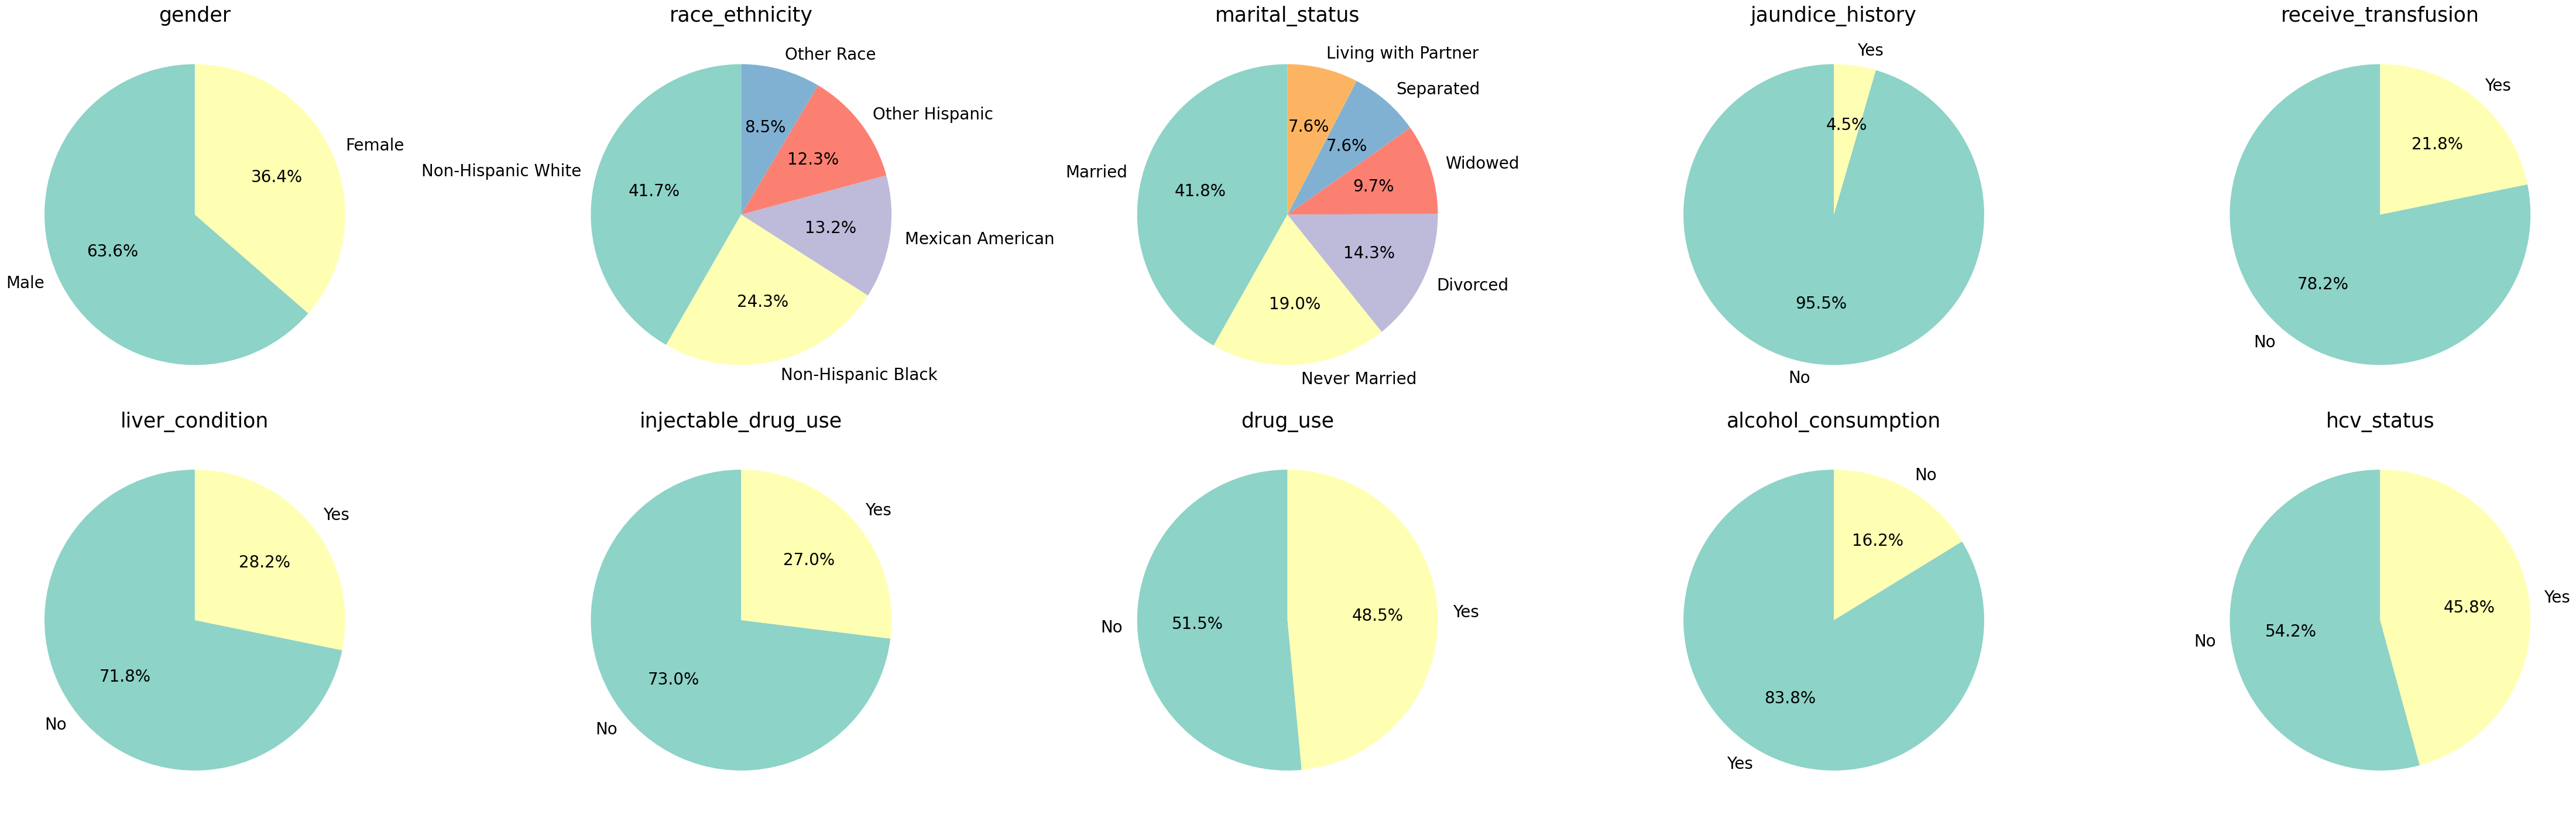

In [7]:
# Jumlah kolom kategorikal
n_cols = len(cat_columns)

n_per_row = 5
n_rows = math.ceil(n_cols / n_per_row)

fig, axes = plt.subplots(n_rows, n_per_row, figsize=(n_per_row * 9, n_rows * 7))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    data = df_cat[col].value_counts()
    color_count = len(data)
    colors = palette[:color_count]
    axes[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 20}
    )
    axes[i].set_title(col, fontsize=25)

for j in range(n_cols, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Data Distribution

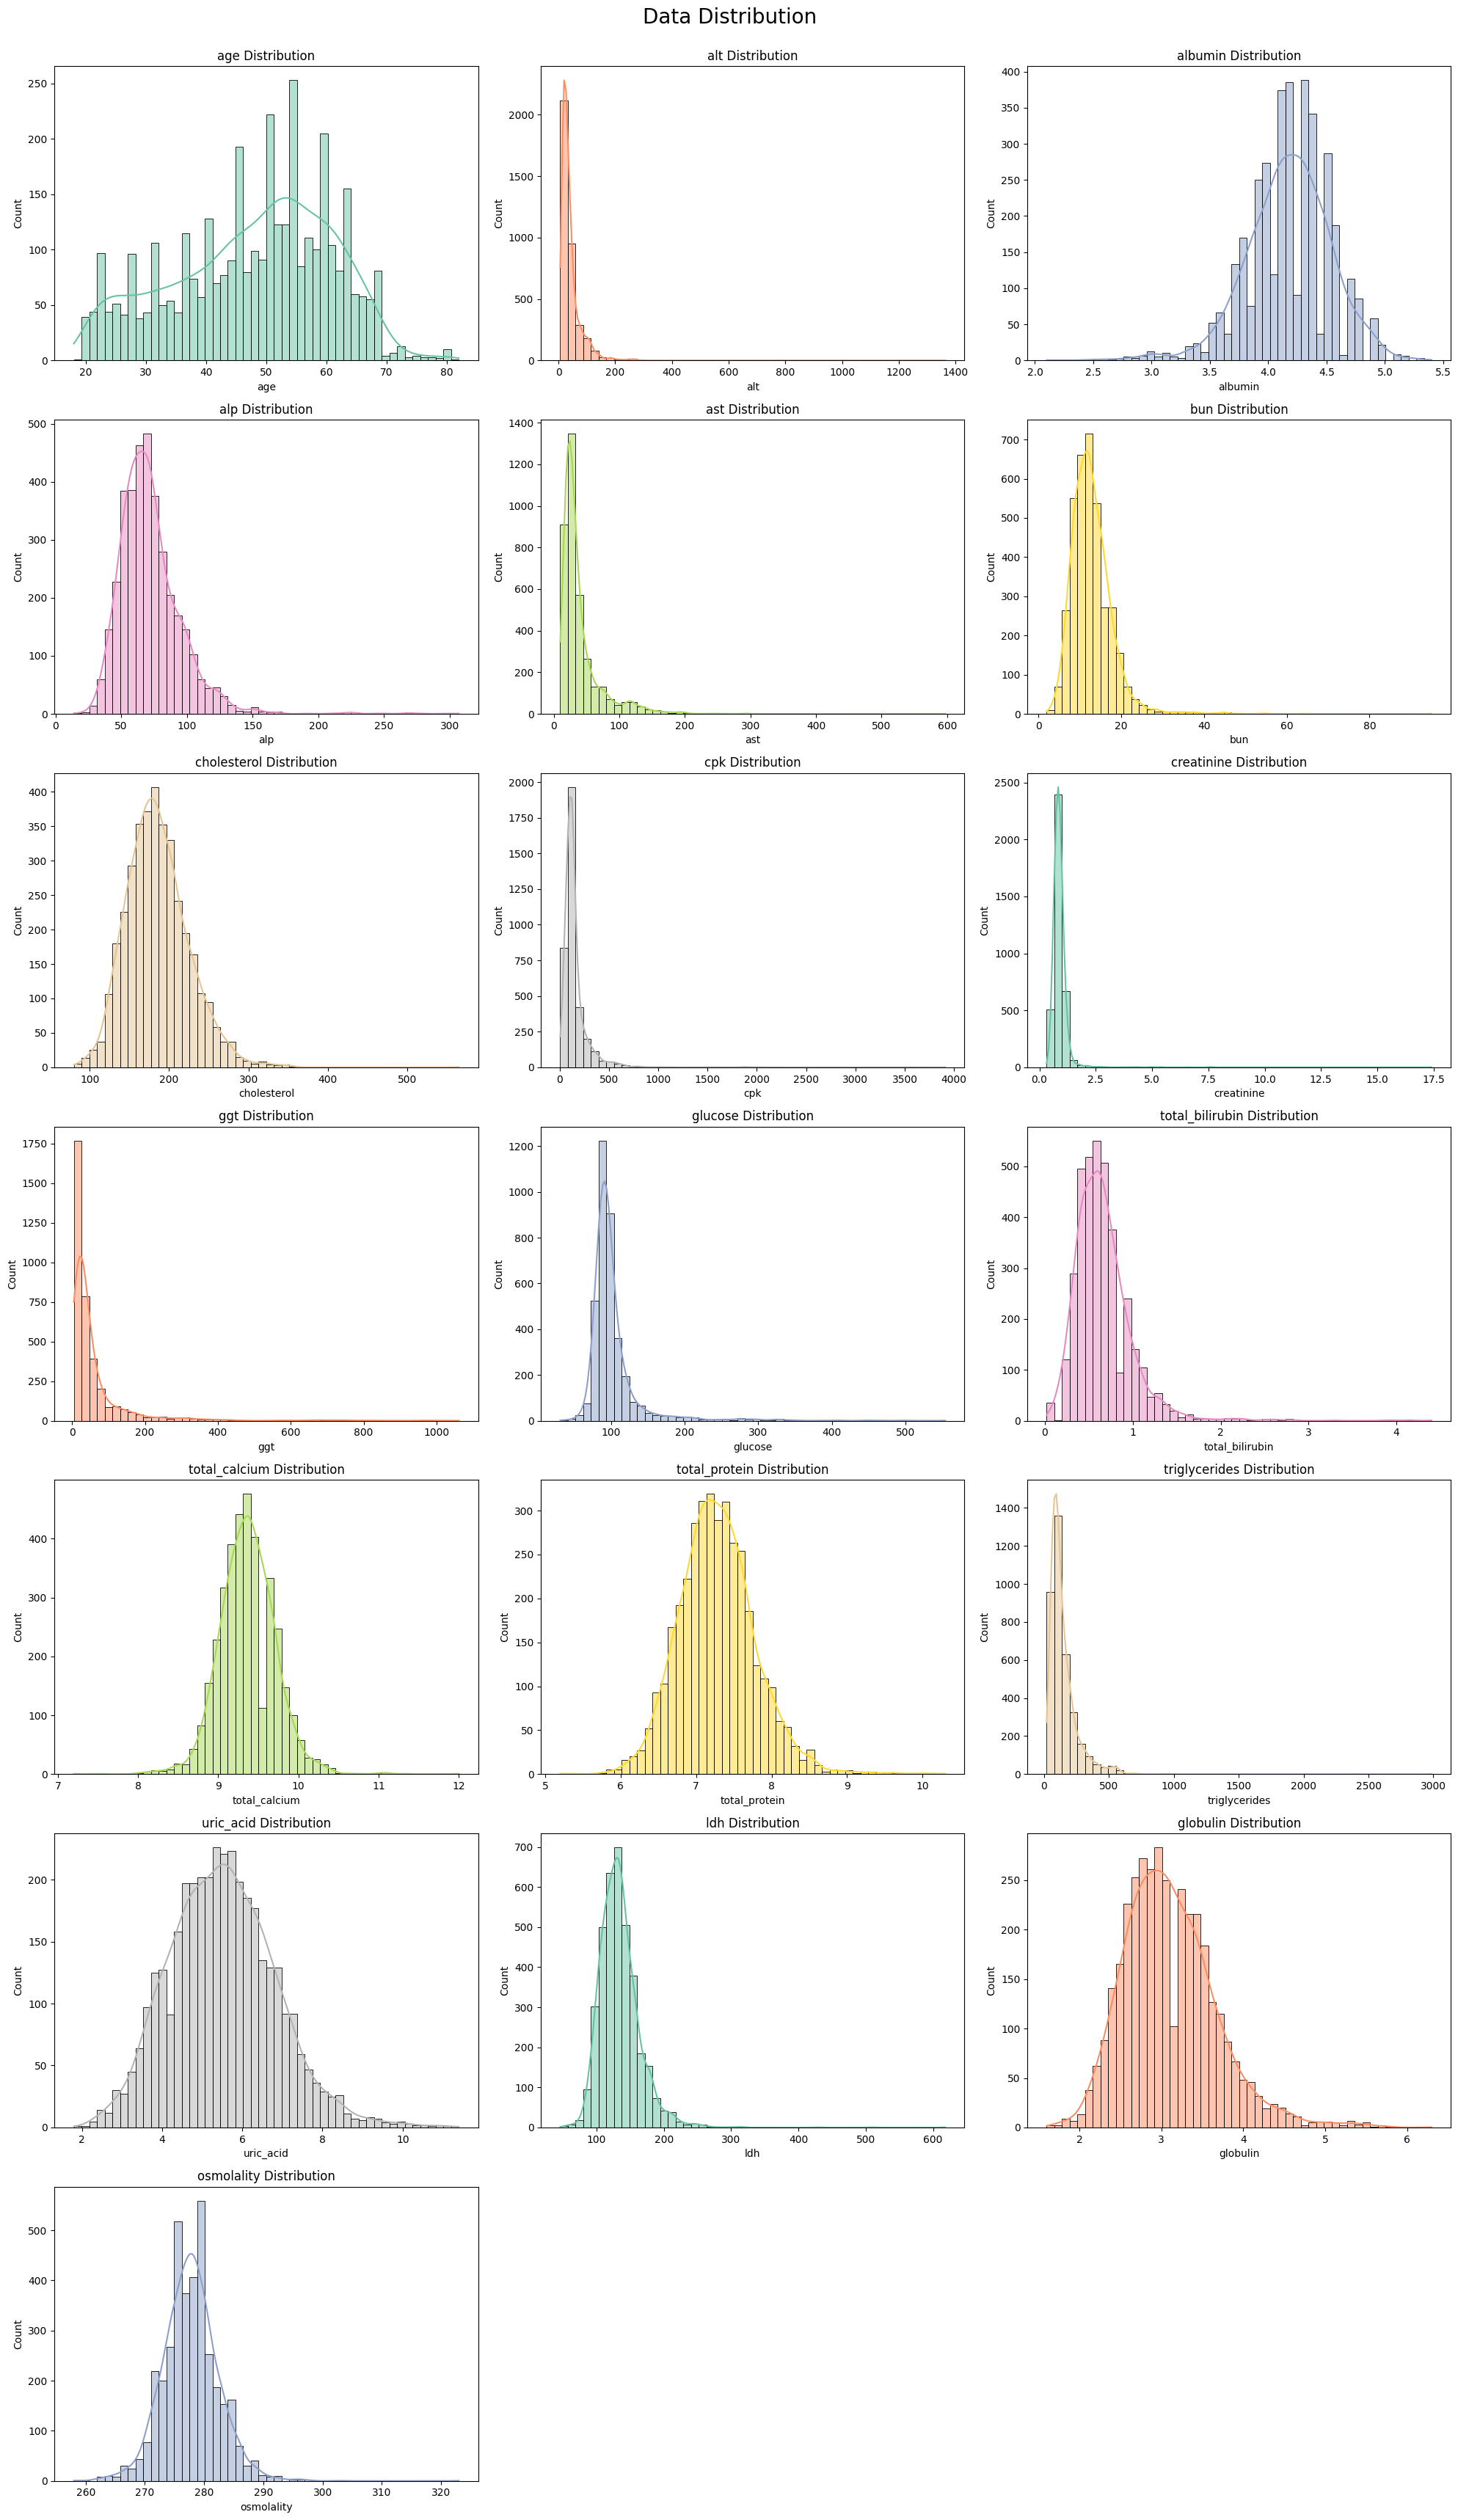

In [8]:
num_columns = ['age',  'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol',
               'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium',
               'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality']

cols = 3
rows = math.ceil(len(num_columns) / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = np.ravel(axes)

colors = sns.color_palette("Set2", len(num_columns))

for i, col in enumerate(num_columns):
    sns.histplot(df[col], bins=50, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hapus subplot kosong kalau ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Data Distribution", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


### Data Correlation

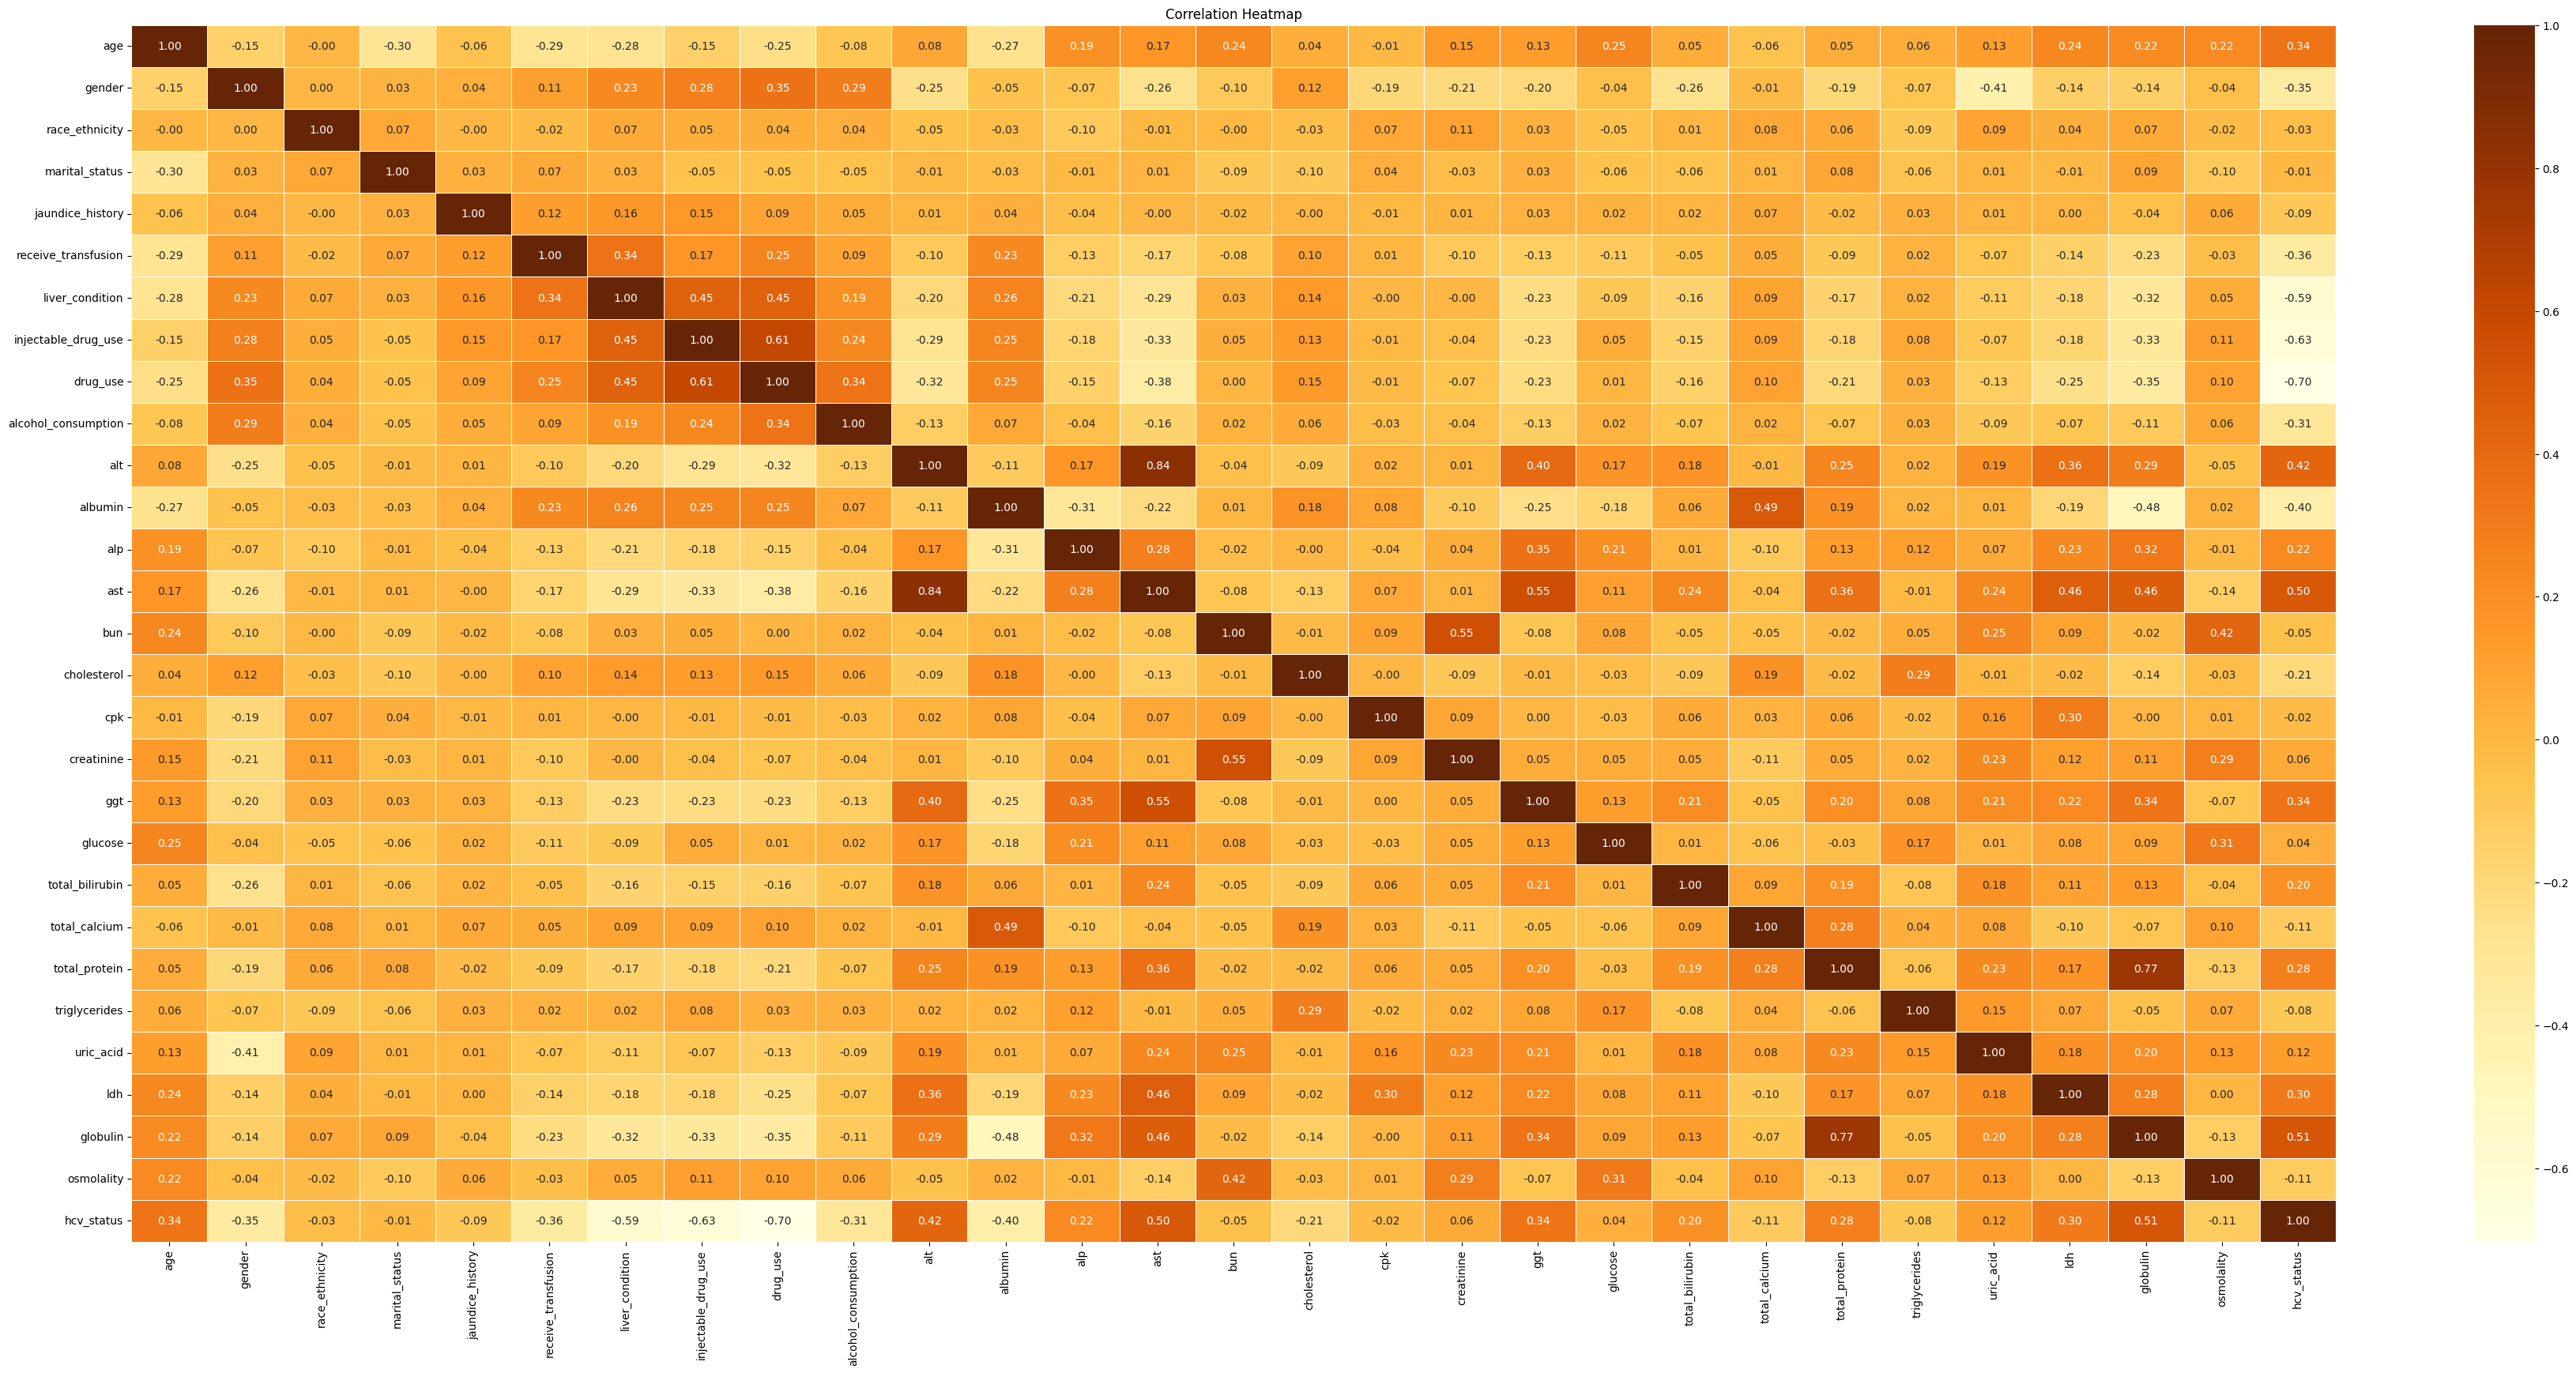

In [9]:
plt.figure(figsize=(45, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Correlation Heatmap")
plt.show()

### Numerical Features vs Target

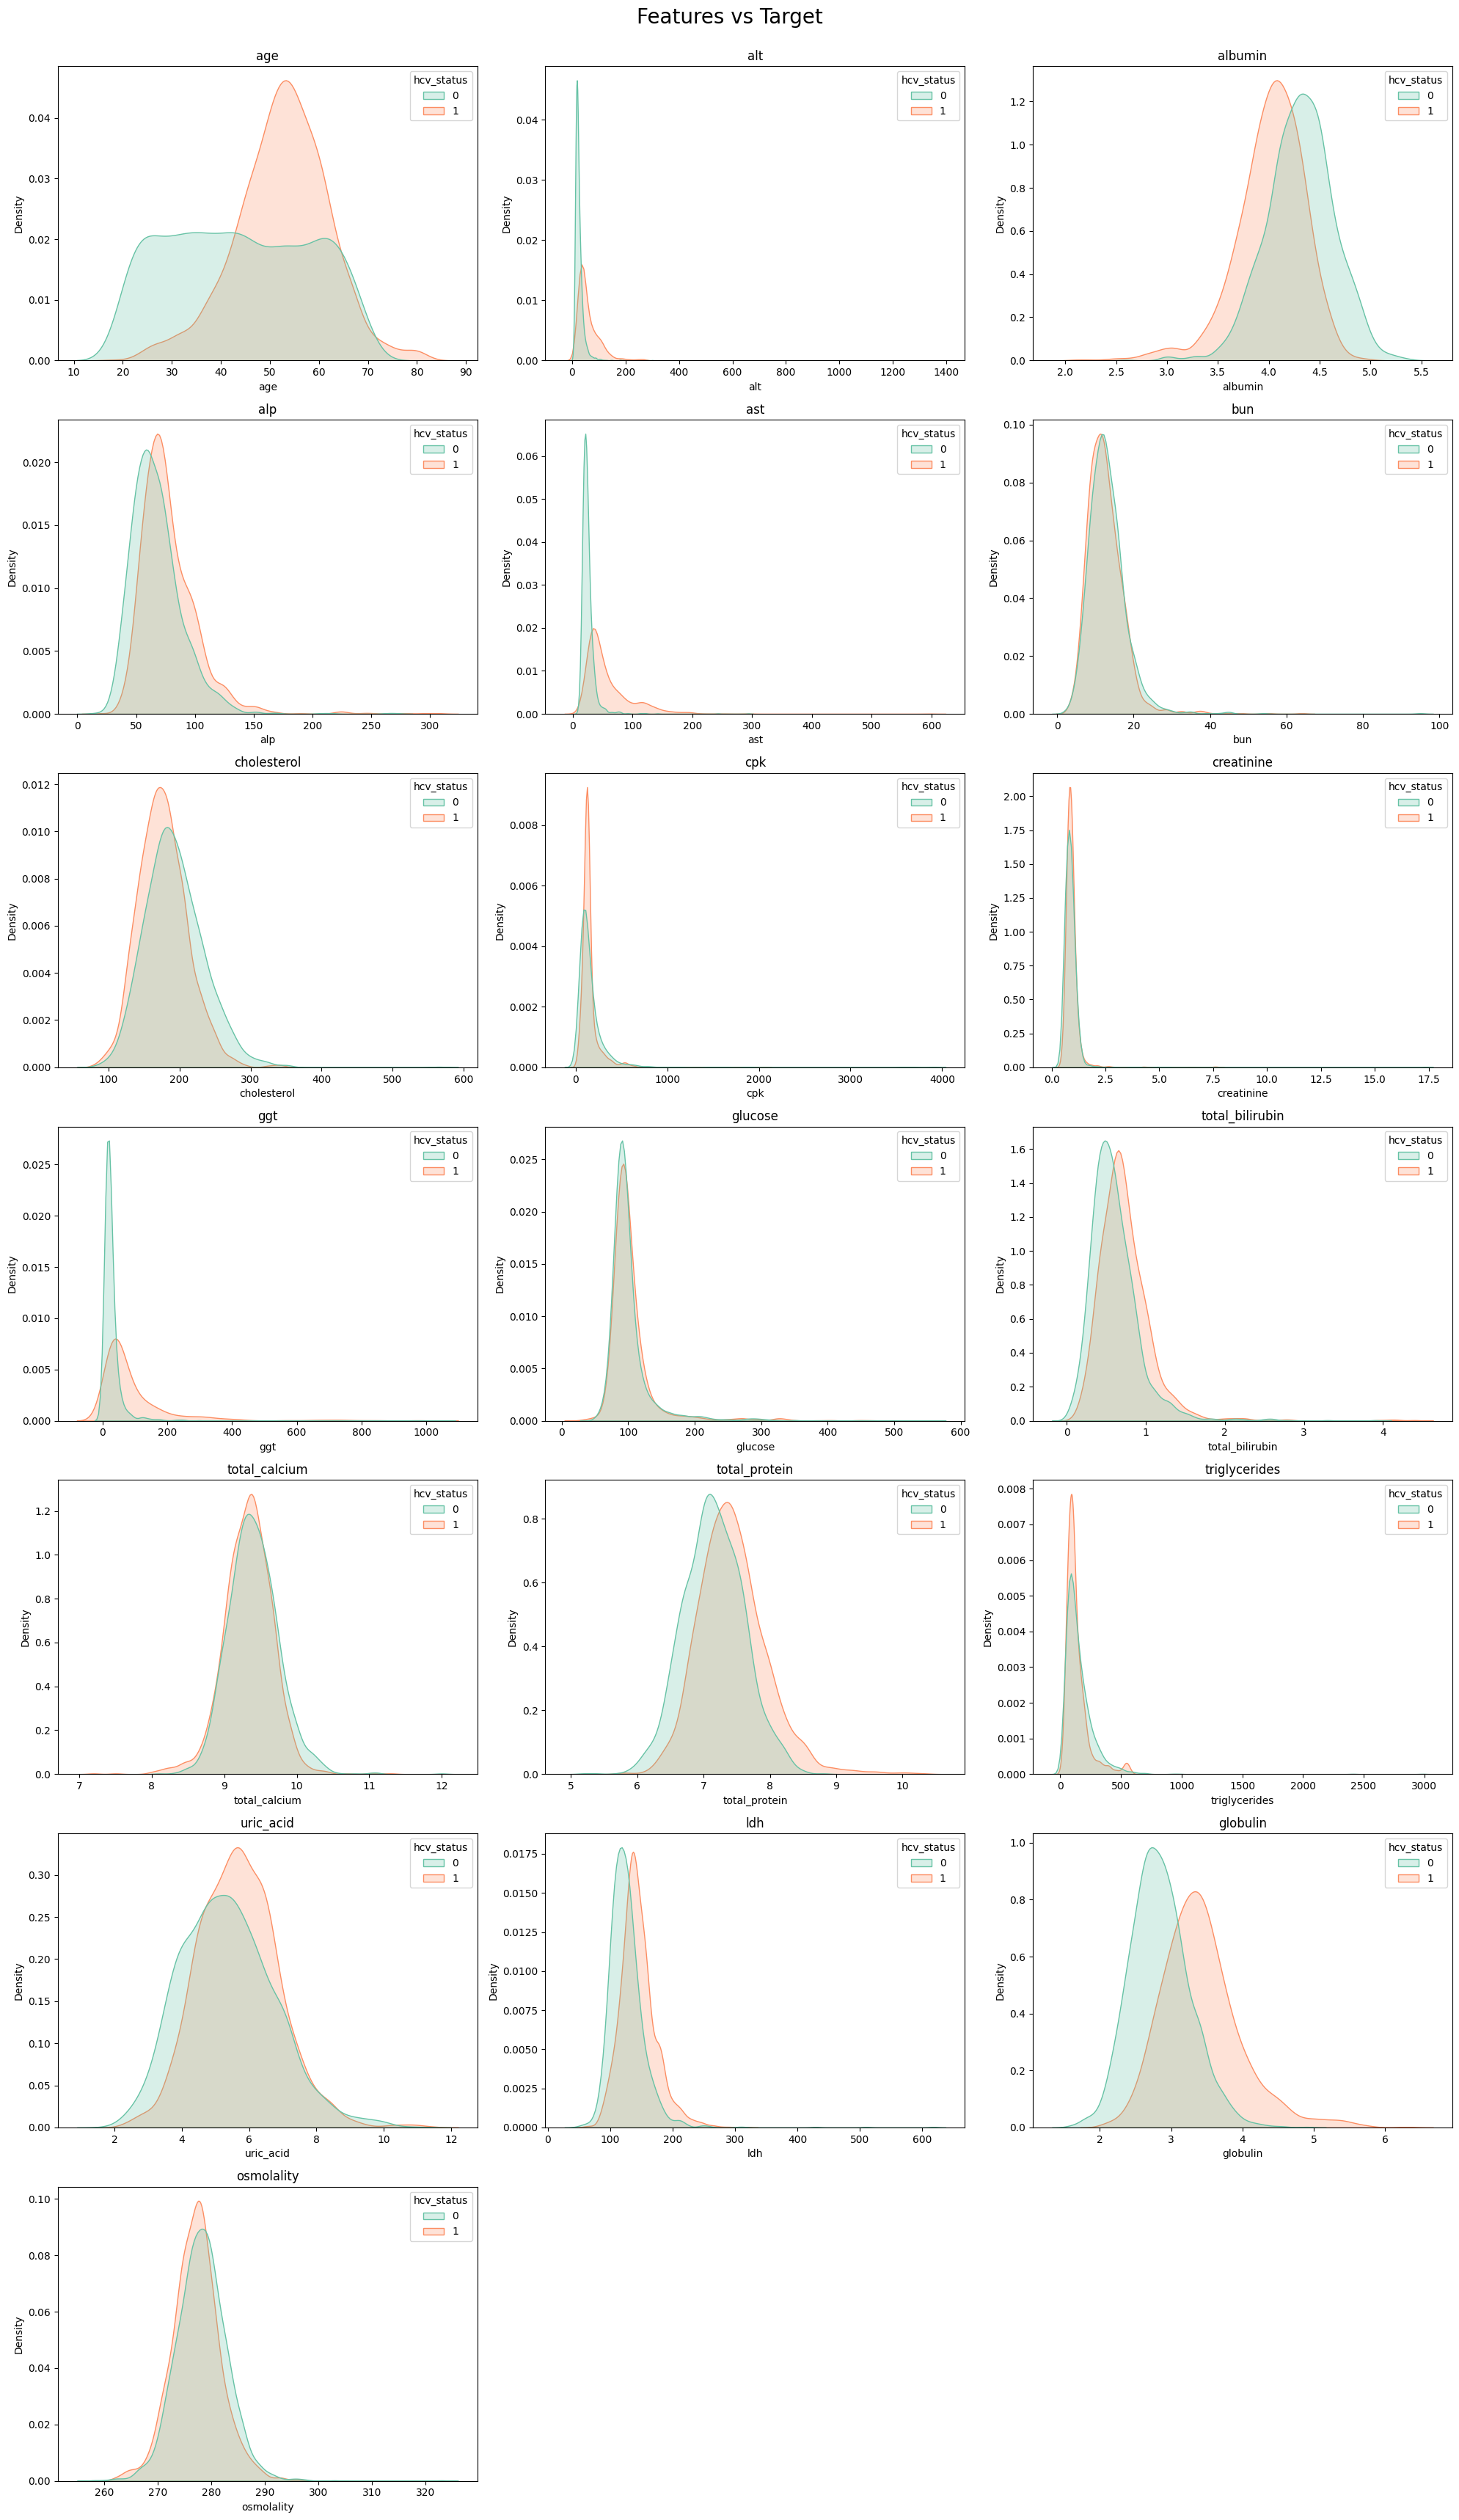

In [10]:
import math

num_columns = df_num.columns  
target = "hcv_status"

cols = 3
rows = math.ceil(len(num_columns) / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

colors = sns.color_palette("Set2", len(df[target].unique())) 

for i, col in enumerate(num_columns):
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False,
                palette=colors, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Features vs Target", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Categorical Feature Vs Target

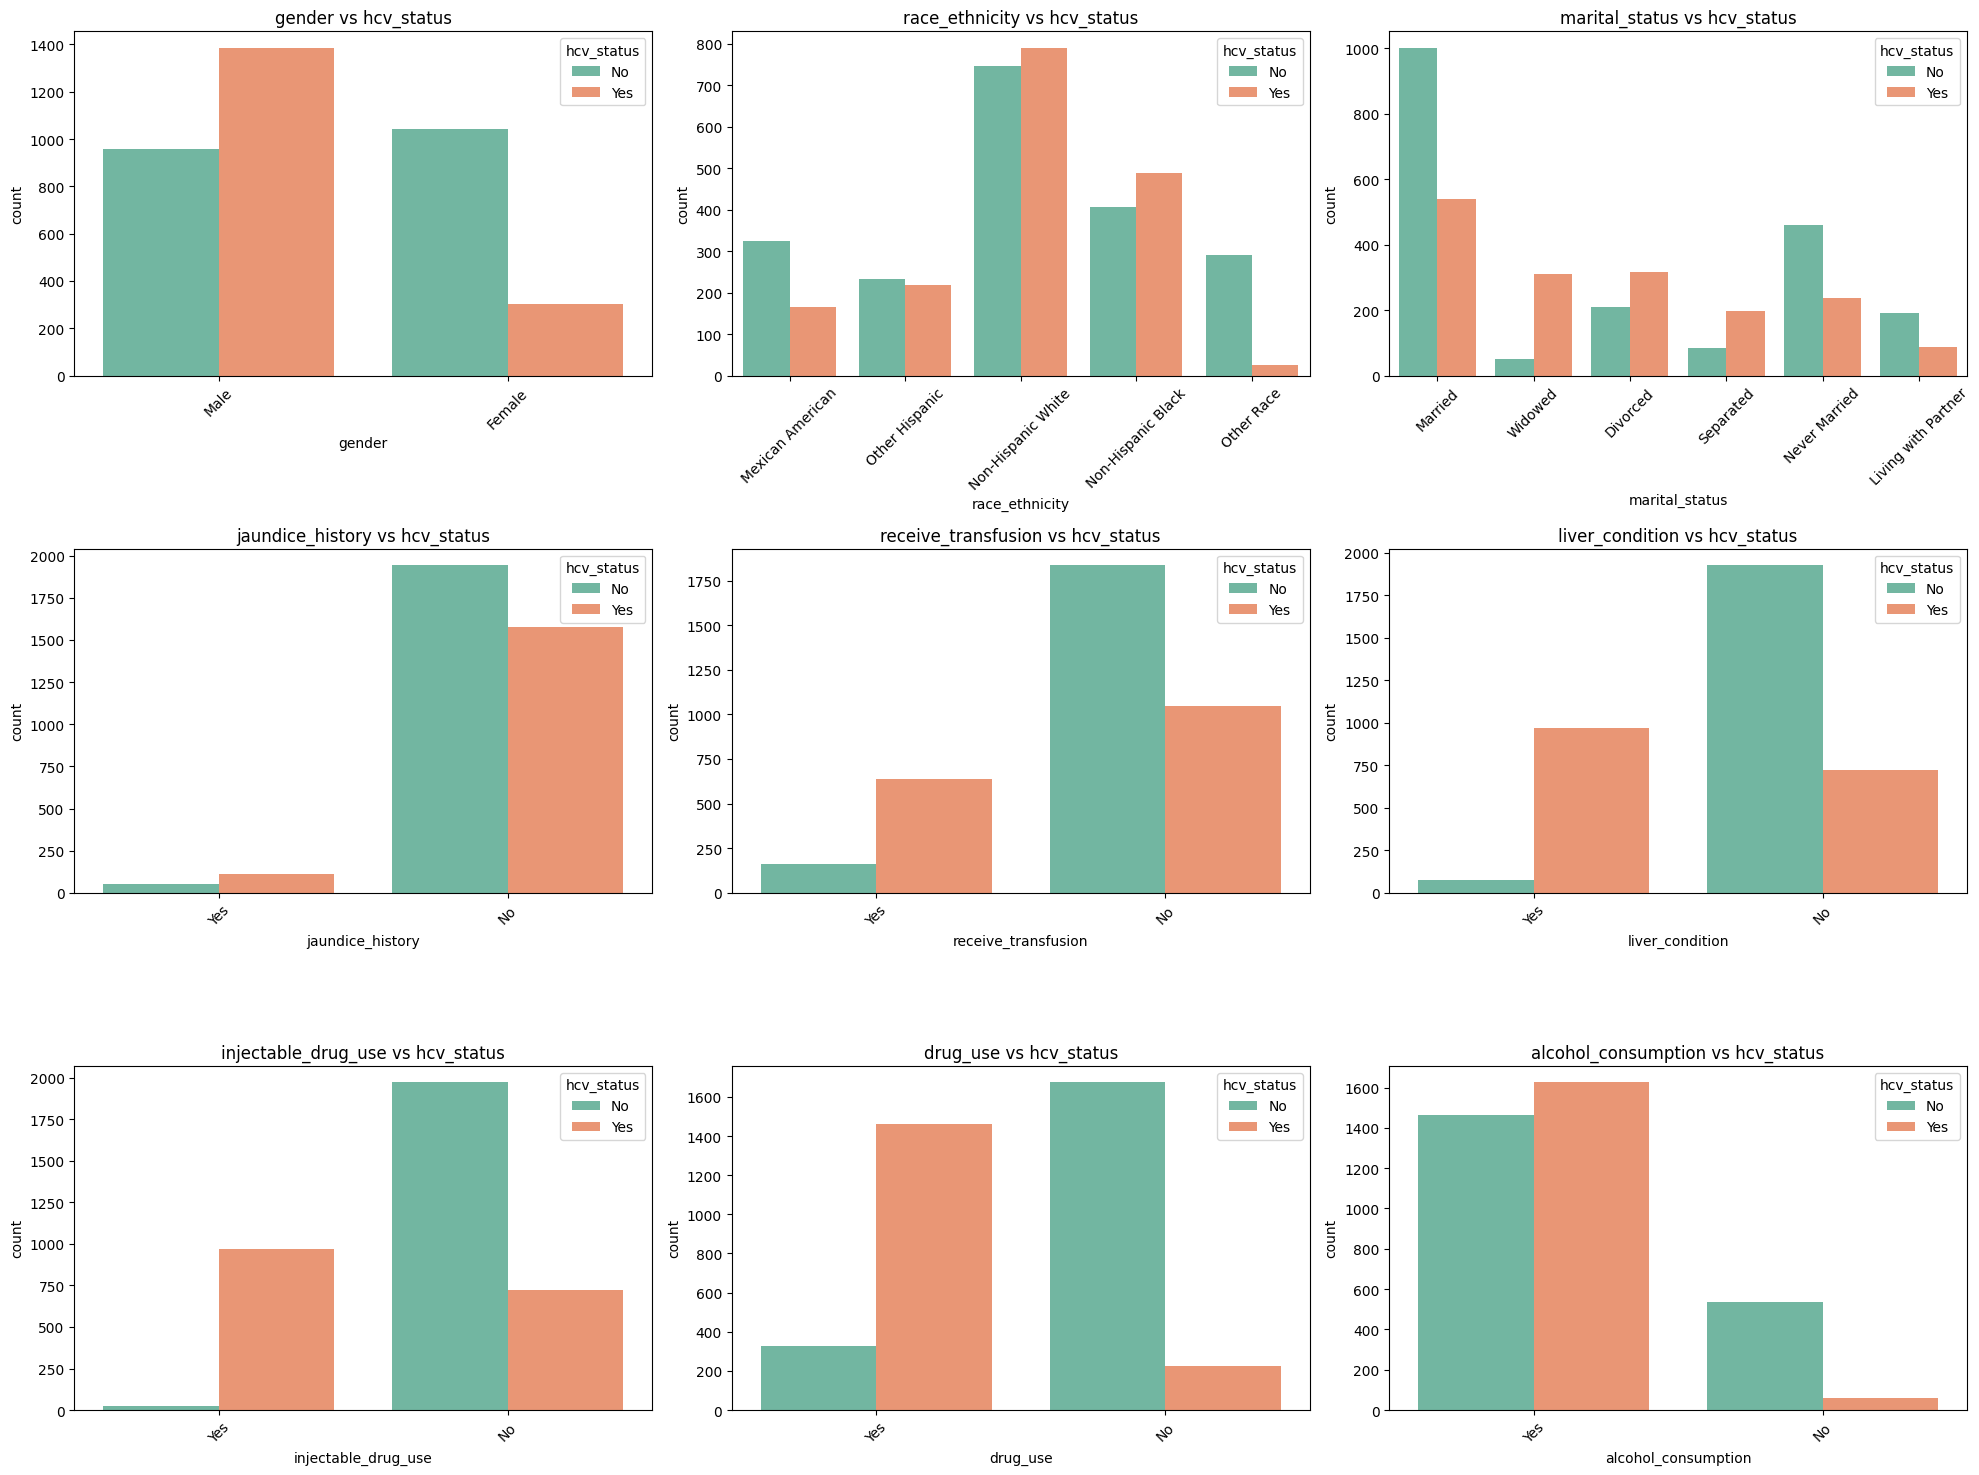

In [11]:
cols = 3
rows = math.ceil(len(num_columns) / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

axes = axes.flatten()

for i, col in enumerate(cat_columns[:-1]):
    sns.countplot(data=df_cat, x=col, hue="hcv_status", palette=colors, ax=axes[i])
    axes[i].set_title(f"{col} vs hcv_status")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Feature Importance

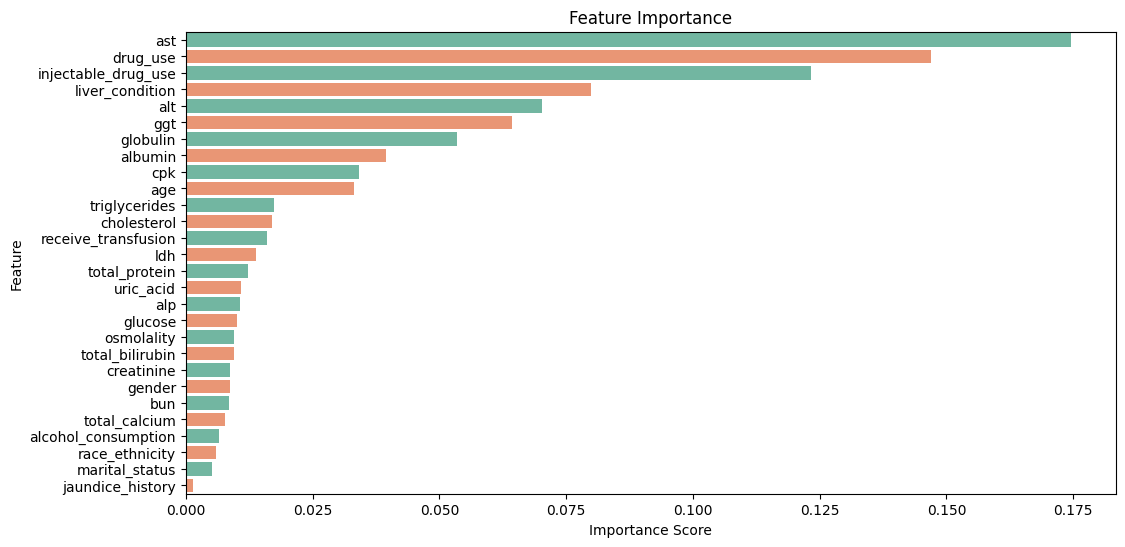

In [12]:
X_train = df.drop(columns=["hcv_status"])
y_train = df["hcv_status"]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df,  palette=colors)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()